In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
import re

In [ ]:

Amazon_data=pd.read_csv('amazon_review.csv')
df=Amazon_data.copy()

In [ ]:
def get_len(dataframe):
  return len(dataframe)

In [ ]:
print("We have",get_len(df),"data")

We have 18000 data


In [ ]:
def null_values():
  return df.isnull().values.any()

In [ ]:
null_values()

True

In [ ]:
def remove_null_rows(df):
  df=df.dropna()
  print("Number of rows after removing NUll data:",get_len(df))

In [ ]:
remove_null_rows(df)

Number of rows after removing NUll data: 17999


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
cl=['ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time',]
def new_df(df,cl):
  return df.drop(columns=cl)

In [ ]:
df=new_df(df,cl)

In [ ]:
df.head()

,Id,Score,Summary,Text
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,5,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
def wordinreview(dataframe):
    dic={}
    for index,rows in dataframe.iterrows():
      ## Getting the number of words by splitting them by a space
        dic[index]=len(rows['Text'].split(" "))
    return pd.Series(dic)

In [ ]:
def hist_lenght_word(df):
  words_per_review=wordinreview(df)
  words_per_review.hist(bins = 100)
  plt.xlabel('Review Length (words)')
  plt.ylabel('Frequency')
  plt.show()

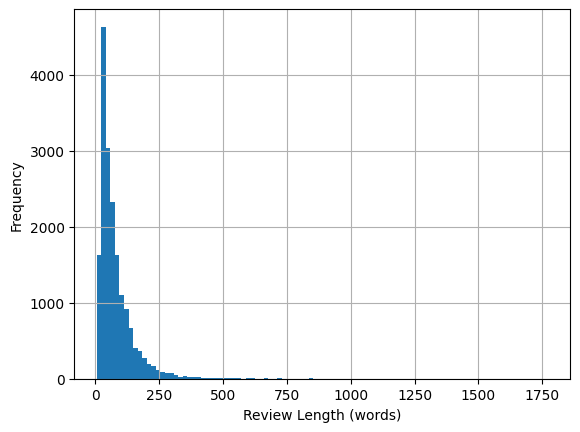

In [ ]:
hist_lenght_word(df)

In [ ]:
#in average we have  word per review
def Print_info_word():
    print('Average words:', wordinreview(df).mean())
    print('max num words :', wordinreview(df).max())
    print('Skewness:', wordinreview(df).skew())
Print_info_word()

Average words: 79.51405555555556
max num words : 1772
Skewness: 4.335670977793614


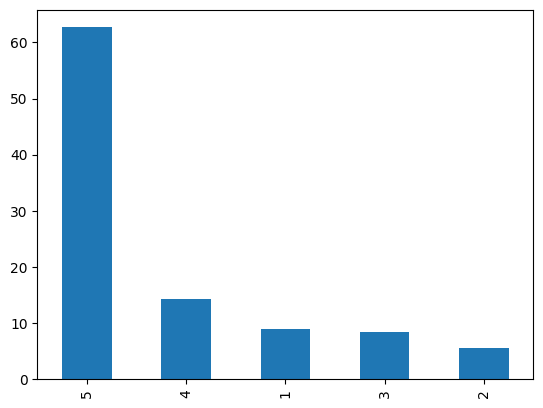

In [ ]:
#distribution rating
rating_percent=100*df.Score.value_counts()/len(df)
rating_percent.plot.bar()
plt.show()

In [ ]:
from PIL import Image
from nltk.corpus import stopwords
from wordcloud import ImageColorGenerator,STOPWORDS,WordCloud

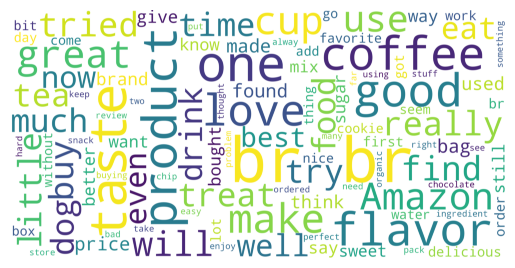

In [ ]:
def Print_Word_Cloud():
    text = ' '.join(df['Text'])



    wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                          max_words=100, # The maximum number of words
                          background_color="white",
                          scale = 10, # Scaling between computation and drawing
                          width=800, # Width of the canvas
                          height=400 # Height of the canvas
                         ).generate(text)

    plt.figure()
    plt.imshow(wordcloud,
               interpolation="bilinear") # to make the displayed image appear more smoothly
    plt.axis("off")
    plt.show()

Print_Word_Cloud()

### Check for pre-processing

In [ ]:
def Clean_reviews(text):

    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    text = re.sub(r'<.*?>', '', text)

    return text

df['Text'] = df['Text'].apply(Clean_reviews)


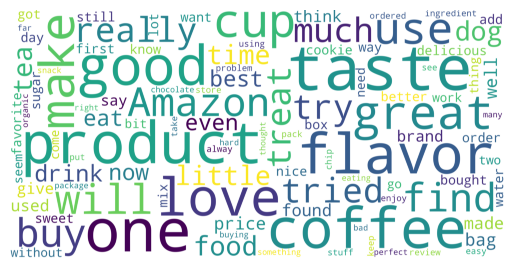

Average words: 78.07866666666666
max num words : 1707
Skewness: 4.297628076912972


In [ ]:
Print_Word_Cloud()
Print_info_word()

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Function to check if emojis exist in text
import emoji
def has_emoji(text):
    for character in text:
        if emoji.is_emoji(character):
            return True
    return False


rows_with_emoji = df[df['Text'].apply(has_emoji)]

for index, row in rows_with_emoji.iterrows():
    print("Index:", index)
    print("Text:", row['Text'])
    print()

num_rows_with_emoji = len(rows_with_emoji)

print("Number of rows with emojis:", num_rows_with_emoji)

Index: 528
Text: I once loved these chips and they were the only chips i would buy.  I discovered them when I was in England back in 2000 and quickly became a fan.  About a year ago I picked up a bag that was on sale at my local supermarket.  I was finding it odd that they were on sale so much but took advantage of it.  After opening the bag I found the chips were not even close to the Kettle chips I was used to.  They were all uniform whitish yellow in color, flavor was way off, the lovely extra crisp brown chips were gone completely and I was very disappointed.  So I e-mailed Kettle with the following:  "What Happened? I bought this bag of chips the other day and they have a very different taste; It tastes "cheaper". I don't know how else to put it... I also noticed that the chips seemed to be less cooked as I did not see any of the browner colored chips that have the most flavor. I am hoping that nothing has changed with the ingredients or process used to produce this product. Did I

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 48.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
text = df['Text']
score = df['Score']


ngram_range = (2, 3)


vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english', min_df=1)

X = vectorizer.fit_transform(text)


ngram_features = vectorizer.get_feature_names_out()


ngram_counts = X.sum(axis=0)

ngram_df = pd.DataFrame(ngram_counts, columns=ngram_features)
ngram_df = ngram_df.transpose()
ngram_df.columns = ['Frequency']

ngram_df = ngram_df.sort_values('Frequency', ascending=False)

# Print the top n-grams along with their frequencies
num_top_ngrams = 10
print(ngram_df.head(num_top_ngrams))

                  Frequency
gluten free             780
ve tried                531
highly recommend        483
cup coffee              475
taste like              459
grocery store           420
just right              344
peanut butter           338
tastes like             338
really good             324


Those are the most  frequented bi-gram, and we see we have few positive sentence.





# VADER Sentiment Scores

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
analyser_object=SentimentIntensityAnalyzer()

In [ ]:
def vader_scores():
    dic= {}
    for i, row in tqdm(df.iterrows(), total=len(df)):
        review=row['Text']
        myid=row['Id']
        dic[myid]=analyser_object.polarity_scores(review)
    return dic

Vader retuns 4 values:


*   a neutrality score



*   a positivity score


*   a negativity score
*   an overall score that summarizes the previous scores





In [ ]:
vader_scores()

  0%|          | 0/18000 [00:00<?, ?it/s]

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.018, 'neu': 0.84, 'pos': 0.142, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 1

In [ ]:
print(df.Text[1],"   Vader score : ",analyser_object.polarity_scores(df.Text[1]))

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".    Vader score :  {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}


If compound is superior to 0.05 its a positive review in general and if its inferior to -0.05 its negative in general .

In [ ]:
vaders_df=pd.DataFrame(vader_scores()).T
vaders_df=vaders_df.reset_index().rename(columns={'index': 'Id'})
vaders_df=vaders_df.merge(df,how='left')

  0%|          | 0/18000 [00:00<?, ?it/s]

In [ ]:
vaders_df

,Id,neg,neu,pos,compound,Score,Summary,Text
0,1,0.000,0.695,0.305,0.9441,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...
17995,17996,0.000,0.847,0.153,0.7145,4,peanut butter without all the fat?,I don't think this tastes more than OK when yo...
17996,17997,0.063,0.843,0.094,0.6757,3,Good..but price is AWFUL,It's a relatively smaller jar that you get..ab...
17997,17998,0.000,0.848,0.152,0.9085,5,Great stuff but much cheaper @ netrition,I love this peanut butter. It has 25% of the c...
17998,17999,0.000,0.680,0.320,0.9899,5,a healthier peanut butter,I have been using Bell Plantation for 3 years ...


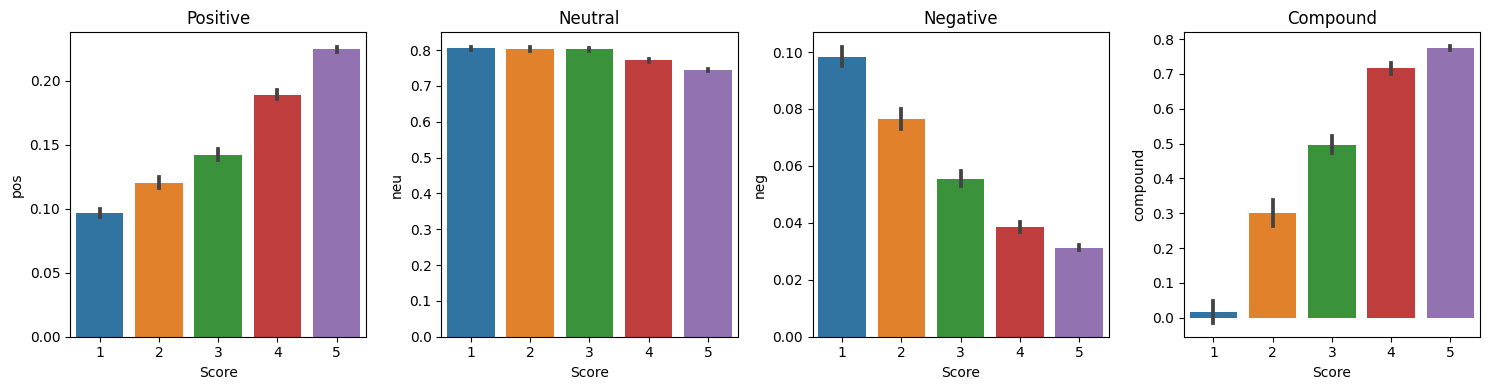

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.barplot(data=vaders_df, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders_df, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders_df, x='Score', y='neg', ax=axs[2])
sns.barplot(data=vaders_df,x='Score',y='compound',ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

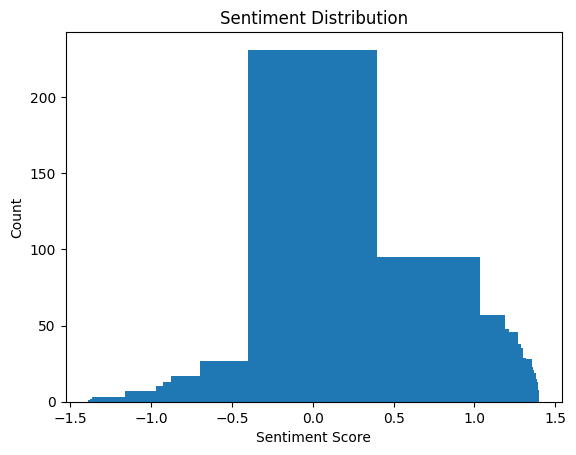

In [ ]:
sentiment_distribution = vaders_df['compound'].value_counts()
plt.bar(sentiment_distribution.index, sentiment_distribution.values)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

The correlation coefficient between sentiment score (compound) and rating is  0.4937 with a p-value of  0.0000.


<ipython-input-36-733356da6294>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vaders_df.groupby("Score").mean()["compound"].plot(kind="bar", figsize=(10, 6))


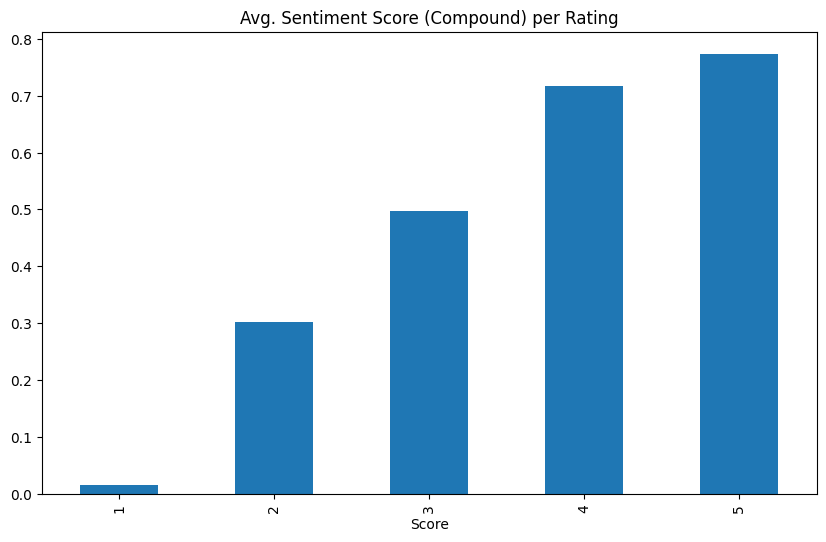

In [ ]:
import numpy as np
import scipy.stats as stats
print("The correlation coefficient between sentiment score (compound) and rating is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(vaders_df['Score'], vaders_df["compound"])))
vaders_df.groupby("Score").mean()["compound"].plot(kind="bar", figsize=(10, 6))
plt.title("Avg. Sentiment Score (Compound) per Rating")
plt.show()



---

# **roBERTa**

---



In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
from nltk.corpus import stopwords
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### splitting ,dataset,dataloader tensors

In [ ]:
X= df['Text']
y=df['Score']
# Split the dataset into train, validation, and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

X_train = train_data['Text'].values
y_train = train_data['Score'].values

X_val = val_data['Text'].values
y_val = val_data['Score'].values

X_test = test_data['Text'].values
y_test = test_data['Score'].values

In [ ]:
pd.DataFrame(y_train).value_counts()

5    7294
4    1626
1    1022
3     955
2     623
dtype: int64

In [ ]:
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
num_classes = len(df['Score'].unique())
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base', do_lower_case=True, stop_words=stop_words)

model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=num_classes)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenization
train_encodings = tokenizer.batch_encode_plus(X_train.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')
val_encodings = tokenizer.batch_encode_plus(X_val.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')
test_encodings = tokenizer.batch_encode_plus(X_test.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')

In [ ]:
#for tensors rating goes from 0 to 4
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train - 1))
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], torch.tensor((y_val - 1)))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor((y_test - 1)))

In [ ]:
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

### Fine-tuning and optimization of the model

In [ ]:
#regularization with dropout
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_function = torch.nn.CrossEntropyLoss()

#torch.autograd.set_detect_anomaly(True)
model.dropout = nn.Dropout(0.5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# loop
train_f1_scores = []
train_accuracies = []
val_f1_scores = []
val_accuracies = []
train_losses = []
val_losses = []

scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=2, verbose=True)
best_val_f1 = 0.0
early_stopping_counter = 0


for epoch in tqdm(range(5), desc="Epochs"):
    model.train()
    total_loss = 0
    train_predictions = []
    train_labels = []


    for batch in train_loader:
        input_ids, attention_mask, labels = batch

        optimizer.zero_grad()


        outputs = model(
            input_ids = input_ids.to(device),
            attention_mask = attention_mask.to(device),
            labels = labels.to(device)
        )

        # loss function
        loss = outputs.loss
        total_loss += loss.item()
        # backward and update weigh
        loss.backward()
        optimizer.step()


        train_predictions.extend(torch.argmax(outputs.logits, dim=1).tolist())
        train_labels.extend(labels.tolist())


    train_f1 = f1_score(train_labels, train_predictions, average='micro')
    train_accuracy = accuracy_score(train_labels, train_predictions)
    train_f1_scores.append(train_f1)
    train_accuracies.append(train_accuracy)
    print(f"Epoch {epoch+1} - Training F1-score: {train_f1:.4f}, Accuracy: {train_accuracy:.4f}")
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Époch {epoch+1} -Avg loss : {avg_loss}")


    model.eval()
    with torch.no_grad():
      predicted_labels = []
      true_labels = []
      val_loss = 0

      for batch in val_loader:
          input_ids, attention_mask, labels = batch
          outputs = model(
              input_ids = input_ids.to(device),
              attention_mask = attention_mask.to(device),
              labels=labels.to(device)
          )

          predicted_labels.extend(torch.argmax(outputs.logits, dim=1).tolist())
          true_labels.extend(labels.tolist())
          val_loss += outputs.loss.item()

      avg_val_loss = val_loss / len(val_loader)
      val_losses.append(avg_val_loss)
    print(f"Epoch {epoch+1} - Validation Loss: {avg_val_loss:.4f}")


    accuracy = accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels, average='micro')
    val_f1_scores.append(f1)
    val_accuracies.append(accuracy)


    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Check if validation F1-score has improved
    if f1 > best_val_f1:
        best_val_f1 = f1
        early_stopping_counter = 0
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= 3:  # Stop early if validation F1-score doesn't improve for a certain number of consecutive epochs
            print("Early stopping triggered.")
            break

    # Adjust the learning rate based on validation F1-score
    scheduler.step(f1)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 - Training F1-score: 0.7306, Accuracy: 0.7306
Époch 1 -Avg loss : 0.729409425198618
Epoch 1 - Validation Loss: 0.6475
Accuracy: 0.7535
F1-score: 0.7535


Epochs:  20%|██        | 1/5 [19:30<1:18:02, 1170.65s/it]

Epoch 2 - Training F1-score: 0.7847, Accuracy: 0.7847
Époch 2 -Avg loss : 0.5578211695369747


Epochs:  40%|████      | 2/5 [38:59<58:29, 1169.73s/it]  

Epoch 2 - Validation Loss: 0.6434
Accuracy: 0.7444
F1-score: 0.7444
Epoch 3 - Training F1-score: 0.8252, Accuracy: 0.8252
Époch 3 -Avg loss : 0.46327420433776245


Epochs:  60%|██████    | 3/5 [58:27<38:57, 1168.74s/it]

Epoch 3 - Validation Loss: 0.6736
Accuracy: 0.7514
F1-score: 0.7514
Epoch 4 - Training F1-score: 0.8590, Accuracy: 0.8590
Époch 4 -Avg loss : 0.3772626560776391


Epochs:  60%|██████    | 3/5 [1:17:54<51:56, 1558.28s/it]

Epoch 4 - Validation Loss: 0.7121
Accuracy: 0.7451
F1-score: 0.7451
Early stopping triggered.


In [ ]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=5)
model.load_state_dict(torch.load('best_model.pt'))

#tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base', do_lower_case=True)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

### Final evaluation  on the  unseen data

In [ ]:
# Evaluation on the test set
model.to(device)
model.eval()
test_predictions = []
test_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids.to(device), attention_mask=attention_mask.to(device),labels = labels.to(device))
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)

        test_predictions.extend(predictions.tolist())
        test_labels.extend(labels.tolist())
    accuracy_score(test_labels, test_predictions)
    precision = precision_score(test_labels, test_predictions, average='micro')
    recall = recall_score(test_labels, test_predictions, average='micro')
    f1 = f1_score(test_labels, test_predictions, average='micro')


# Confusion matrix
confusion_mat = confusion_matrix(test_labels, test_predictions)
classification_rep = classification_report(test_labels, test_predictions)

print("Confusion Matrix:")
print(confusion_mat)
#print("Classification Report:")
#print(classification_rep)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Confusion Matrix:
[[ 207   27   46    4   25]
 [  41   34  120    8   11]
 [  11   15  198   47   42]
 [   1    0   74  147  321]
 [   6    1   21   69 2124]]
Accuracy: 0.7451
Precision: 0.7528
Recall: 0.7528
F1-score: 0.7528


Our DISTILBERT model had an accuracy of 0.7493 and a F1-score of 0.7372 in predicting the testing group’s score based
on the text. These results are very impressive given that the reviews were subjective and written by individuals.

###  Prediction on unseen review

In [ ]:
# Save the trained model

model.eval()

# Function to predict the rating of a new text input
def predict_rating(text):
    encoding = tokenizer.encode_plus(text, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']

    with torch.no_grad():
        outputs = model(input_ids=input_ids.to(device), attention_mask=attention_mask.to(device))
        logits = outputs.logits
        predicted_rating = torch.argmax(logits, dim=1)

    return predicted_rating.item()

In [ ]:
# Example usage of the predict_rating function
new_text = "Great price on a great gluten-free product!,We have paid over $5 a package in health food stores for this mix.  Buying via Amazon is both cheaper and easier thanks to the direct to the door shipping!  The mix works great in our bread machine and comes out perfect every time!  Our kids love it and usually eat half a loaf as soon as its done!"

predicted_rating = predict_rating(new_text)
if predicted_rating ==4:
  print( "Really positive review")
if predicted_rating ==3:
  print( "positive review")
if predicted_rating ==2:
  print( "neutral review")
if predicted_rating ==1:
  print( "bad review ")
if predicted_rating ==0:
  print( "Really bad review")


Really positive review
